In [1]:
#Importing the Libraries
#!pip install keras
#!pip install tensorflow
#import tensorflow as tf
#!pip install yahoo-finance
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
!pip install pydot
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
import keras.backend as k
from keras.callbacks import EarlyStopping
#from keras.optimizers import adam
from keras.models import load_model
from keras.utils.vis_utils import plot_model


import yfinance as yf

In [2]:
df = yf.download('AMZN', start='2010-01-01', end='2022-01-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2022-01-24,2780.000000,2898.899902,2707.040039,2890.879883,2890.879883,7781200
2022-01-25,2844.850098,2872.000000,2762.899902,2799.719971,2799.719971,4541200
2022-01-26,2895.000000,2903.699951,2746.370117,2777.449951,2777.449951,4780100


In [3]:
# #Get the Dataset
# df=pd.read_csv("MicrosoftStockData.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
# temp  = [ var.split(',') for var in df['Volume']]
# df['Volume'] = [ float(var[0] + var[1] + var[2]) for var in temp]
# df

In [4]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])

#Selecting the Features
features = df[['Open','High','Low','Volume']]

In [5]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(features):
        X_train, X_test = features[:len(train_index)], features[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [6]:
scaler = MinMaxScaler()
fitter  = scaler.fit(X_train)

X_train = fitter.transform(X_train)
X_test = fitter.transform(X_test)

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(features)
#feature_transform = pd.DataFrame(columns=features,data=feature_transform,index=df.index)
feature_transform

In [7]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [8]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [9]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
346/346 [==============================] - 4s 3ms/step - loss: 1374324.1250
Epoch 2/100
346/346 [==============================] - 1s 3ms/step - loss: 1356510.2500
Epoch 3/100
346/346 [==============================] - 1s 3ms/step - loss: 1334412.7500
Epoch 4/100
346/346 [==============================] - 1s 3ms/step - loss: 1306932.1250
Epoch 5/100
346/346 [==============================] - 1s 3ms/step - loss: 1274691.5000
Epoch 6/100
346/346 [==============================] - 1s 3ms/step - loss: 1238432.3750
Epoch 7/100
346/346 [==============================] - 1s 3ms/step - loss: 1198870.5000
Epoch 8/100
346/346 [==============================] - 1s 3ms/step - loss: 1156659.8750
Epoch 9/100
346/346 [==============================] - 1s 3ms/step - loss: 1112387.5000
Epoch 10/100
346/346 [==============================] - 1s 3ms/step - loss: 1066580.6250
Epoch 11/100
346/346 [==============================] - 1s 3ms/step - loss: 1019714.9375
Epoch 12/100
346/346 [========

In [10]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

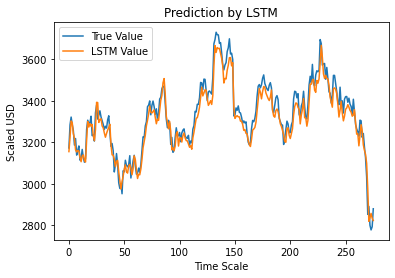

In [11]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
